In [1]:
import os
from matplotlib import pylab as plt

In [2]:
%matplotlib inline
plt.style.use(['dark_background', 'bmh'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')
plt.rc('figure', figsize=(20,5))

In [3]:
N = 20
seeds = [i for i in range(10)]
success = list(list() for seed in seeds)
path = '/misc/vlgscratch4/LecunGroup/nvidia-collab/models_v12/planning_results/'
name = 'MPUR-policy-gauss-model=vae-zdropout=0.5-policy-gauss-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.2-' + \
        'lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=1-seed={seed}-novaluestep{step}.model.log'
steps = [(i + 1) * 5000 for i in range(N)]
                                                                                                                        
for seed in seeds:
    for step in steps:
        file_name = path + name.format(seed=seed, step=step)
        if os.path.isfile(file_name):
            with open(file_name) as f:
                success[seed - 1].append(float(f.readlines()[-1].split()[-1]))
        else:
            success[seed - 1].append(None)

(5000, 105000)

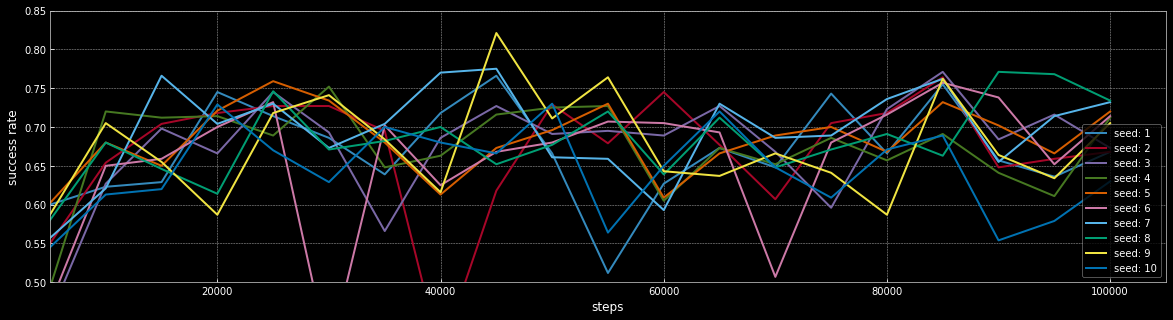

In [4]:
N = 20
steps = [(i + 1) * 5_000 for i in range(N)]
seeds = [i + 1 for i in range(10)]

if success[0][0] is None:
    for seed in seeds:
        plt.plot(steps[1::2], success[seed - 1][1::2], label=f'seed: {seed}')
else:
    for seed in seeds:
        plt.plot(steps, success[seed - 1], label=f'seed: {seed}')
plt.grid(True)
plt.xlabel('steps')
plt.ylabel('success rate')
plt.legend()
plt.ylim([0.40, 0.80])
plt.ylim([0.50, 0.85])
plt.xlim([5_000, 105_000])